In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spdf = pd.read_csv('StudentsPerformance[1].csv') 
spdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
spdf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
gender_counts = spdf['gender'].value_counts()
print("Counts of Gender:")
print(gender_counts)


Counts of Gender:
gender
female    518
male      482
Name: count, dtype: int64


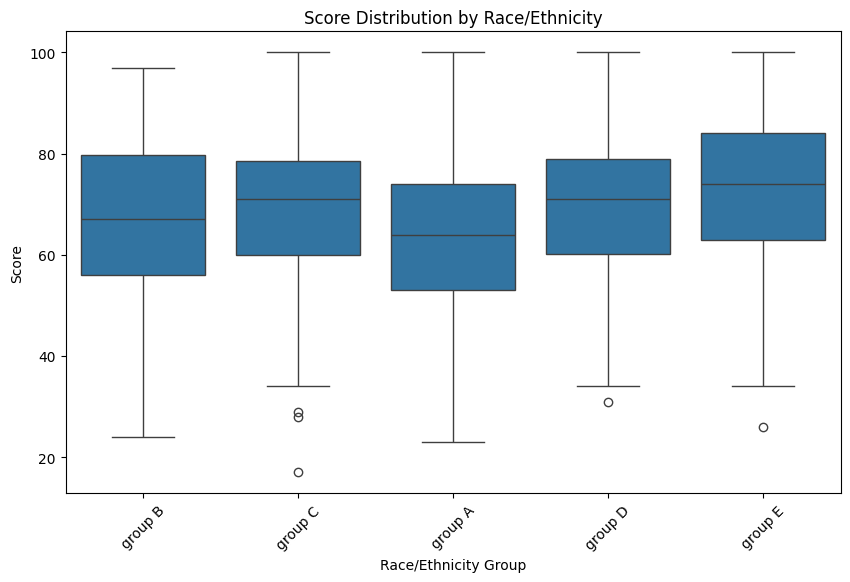

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='race/ethnicity', y='reading score', data=spdf)
plt.title('Score Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [6]:
print("\nStatistics for Scores:")
print(spdf[['math score', 'reading score', 'writing score']].describe())


Statistics for Scores:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


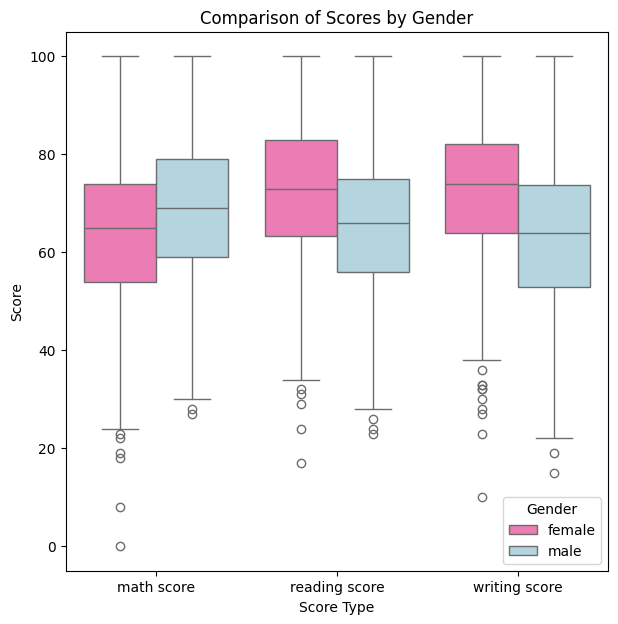

In [7]:
scores_melted = spdf.melt(id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score'],
                           var_name='score_type', value_name='score')

# Create the box plot
plt.figure(figsize=(7, 7))

# Define a color palette
palette = {'male': '#add8e6', 'female': '#ff69b4'}  # Adjust these labels as needed

sns.boxplot(x='score_type', y='score', hue='gender', data=scores_melted, palette=palette)

plt.title('Comparison of Scores by Gender')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.legend(title='Gender')
plt.show()

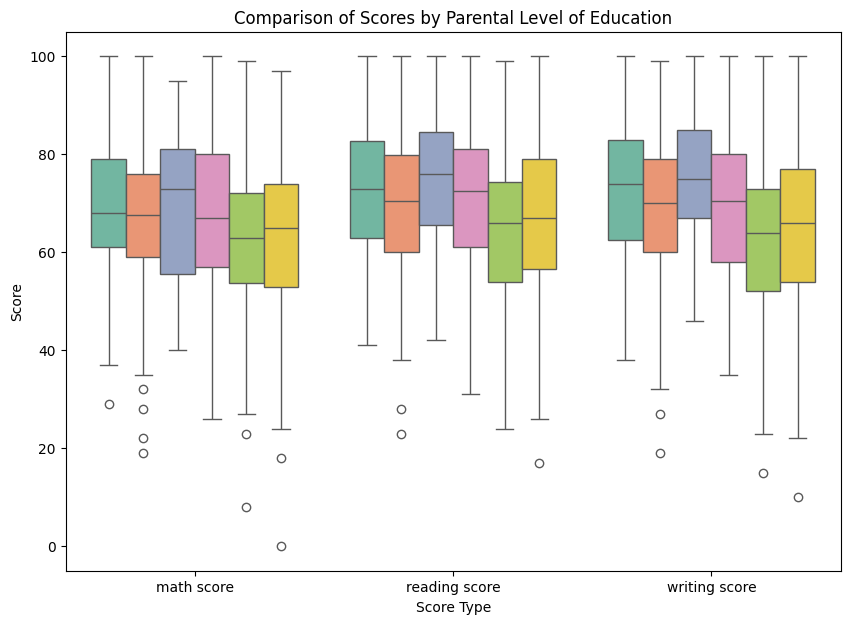

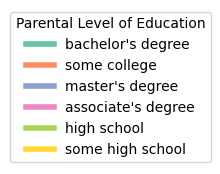

In [8]:
# Melt the DataFrame for parental education levels
scores_melted_education = spdf.melt(id_vars=['parental level of education'], 
                                      value_vars=['math score', 'reading score', 'writing score'],
                                      var_name='score_type', value_name='score')

# Create the box plot
plt.figure(figsize=(10, 7))

# Define a color palette
palette = sns.color_palette("Set2", n_colors=len(scores_melted_education['parental level of education'].unique()))

# Create the boxplot without showing the legend
sns.boxplot(x='score_type', y='score', hue='parental level of education', data=scores_melted_education, palette=palette, legend=False)

plt.title('Comparison of Scores by Parental Level of Education')
plt.xlabel('Score Type')
plt.ylabel('Score')

# Show the plot without the legend
plt.show()

# Create a separate legend
# Create a new figure for the legend
plt.figure(figsize=(2, 2))
handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(scores_melted_education['parental level of education'].unique()))]
labels = scores_melted_education['parental level of education'].unique()

plt.legend(handles, labels, title='Parental Level of Education', loc='center')
plt.axis('off')  # Hide the axes
plt.show()

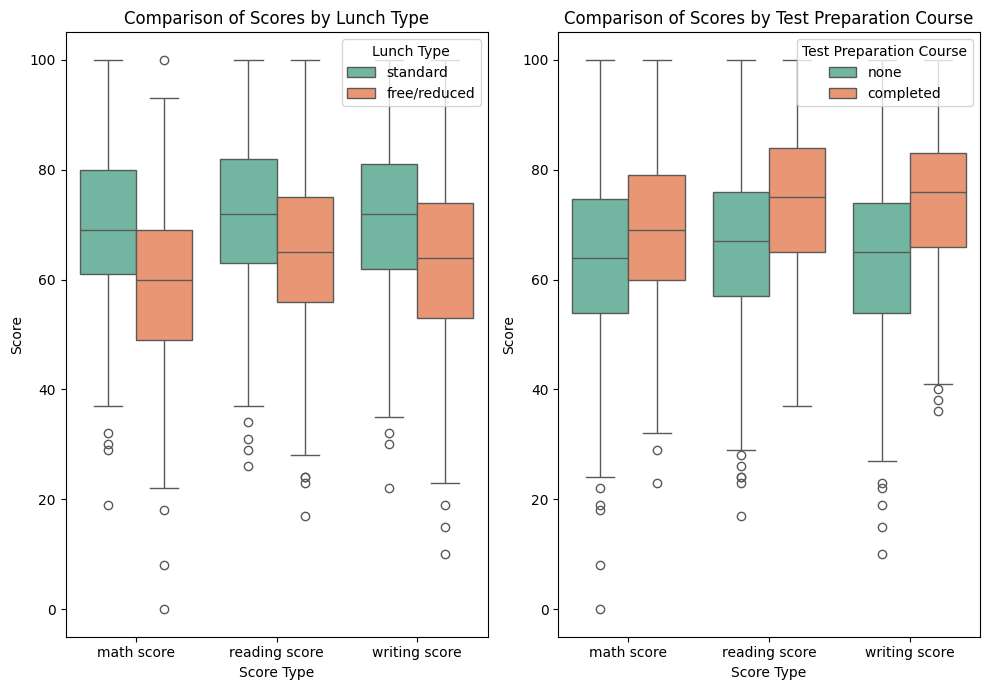

In [9]:
scores_melted_lunch = spdf.melt(id_vars=['lunch'], 
                                  value_vars=['math score', 'reading score', 'writing score'],
                                  var_name='score_type', value_name='score')

scores_melted_prep = spdf.melt(id_vars=['test preparation course'], 
                                 value_vars=['math score', 'reading score', 'writing score'],
                                 var_name='score_type', value_name='score')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Box plot for lunch type
palette_lunch = sns.color_palette("Set2", n_colors=len(scores_melted_lunch['lunch'].unique()))
sns.boxplot(x='score_type', y='score', hue='lunch', data=scores_melted_lunch, palette=palette_lunch, ax=axes[0])
axes[0].set_title('Comparison of Scores by Lunch Type')
axes[0].set_xlabel('Score Type')
axes[0].set_ylabel('Score')
axes[0].legend(title='Lunch Type', loc='upper right')  # Legend inside the plot

# Box plot for test preparation course
palette_prep = sns.color_palette("Set2", n_colors=len(scores_melted_prep['test preparation course'].unique()))
sns.boxplot(x='score_type', y='score', hue='test preparation course', data=scores_melted_prep, palette=palette_prep, ax=axes[1])
axes[1].set_title('Comparison of Scores by Test Preparation Course')
axes[1].set_xlabel('Score Type')
axes[1].set_ylabel('Score')
axes[1].legend(title='Test Preparation Course', loc='upper right')  # Legend inside the plot

# Show the plots
plt.tight_layout()
plt.show()

In [10]:
# Descriptive statistics for writing scores by gender
writing_scores_description = spdf.groupby('gender')['writing score'].describe()
print("Statistics for Writing, Math, and Reading Scores by Gender:")
print(writing_scores_description)

# Descriptive statistics for math scores by gender
math_scores_description = spdf.groupby('gender')['math score'].describe()
print(math_scores_description)

# Descriptive statistics for reading scores by gender
reading_scores_description = spdf.groupby('gender')['reading score'].describe()
print(reading_scores_description)


Statistics for Writing, Math, and Reading Scores by Gender:
        count       mean        std   min   25%   50%    75%    max
gender                                                             
female  518.0  72.467181  14.844842  10.0  64.0  74.0  82.00  100.0
male    482.0  63.311203  14.113832  15.0  53.0  64.0  73.75  100.0
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0
        count       mean        std   min    25%   50%   75%    max
gender                                                             
female  518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0
male    482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0


/tmp/ipykernel_2052/2563653514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='lunch', y='mean', data=mean_counts, palette='viridis')


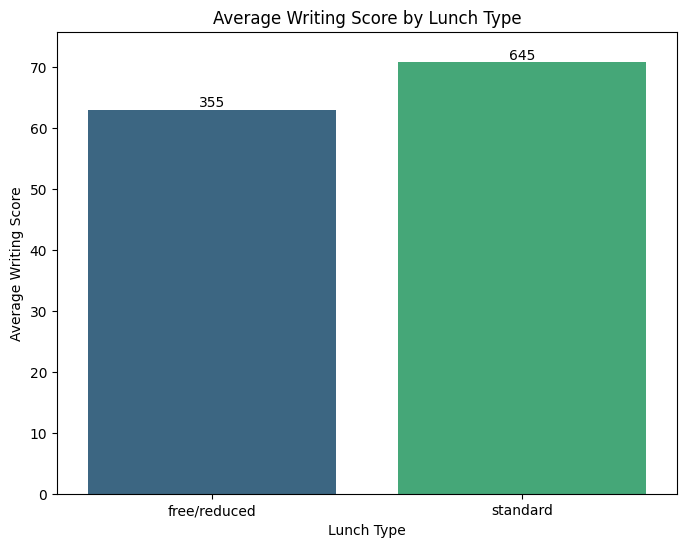

In [11]:
# Calculate the average writing score and count for each lunch type
mean_counts = spdf.groupby('lunch')['writing score'].agg(['mean', 'count']).reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='lunch', y='mean', data=mean_counts, palette='viridis')

# Add the counts on top of the bars
for index, row in mean_counts.iterrows():
    bar_plot.text(row['lunch'], row['mean'] + 0.5, row['count'], color='black', ha="center")

plt.title('Average Writing Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Writing Score')
plt.ylim(0, mean_counts['mean'].max() + 5)  # Adjust y-axis limit for better visibility
plt.show()

Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.

Linear regression 

In [12]:
import statsmodels.api as sm
# Encode categorical variables
spdf['lunch_encoded'] = spdf['lunch'].map({'standard': 0, 'free/reduced': 1})
spdf['gender_encoded'] = spdf['gender'].map({'female': 0, 'male': 1})

# Features and target variable
X = spdf[['math score', 'reading score', 'lunch_encoded', 'gender_encoded']]
y = spdf['writing score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
# Create and fit the model using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Now use statsmodels for detailed summary
X_train_sm = sm.add_constant(X_train)  # Add a constant term for the intercept
sm_model = sm.OLS(y_train, X_train_sm).fit()  # Fit the model

# Print the summary
print(sm_model.summary())

Coefficients: [ 0.25470267  0.73186269  0.09644226 -5.28642969]
Intercept: 3.026971099654986
                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2573.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:54:11   Log-Likelihood:                -2255.6
No. Observations:                 800   AIC:                             4521.
Df Residuals:                     795   BIC:                             4545.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

MSE: Lower is better; it indicates how far off your predictions are from the actual values.
R² Score: Closer to 1 is better; it indicates how well your model explains the variability of the target variable.
Model appears to perform well, as indicated by the high R² score and relatively low MSE.

/tmp/ipykernel_2052/1489149873.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


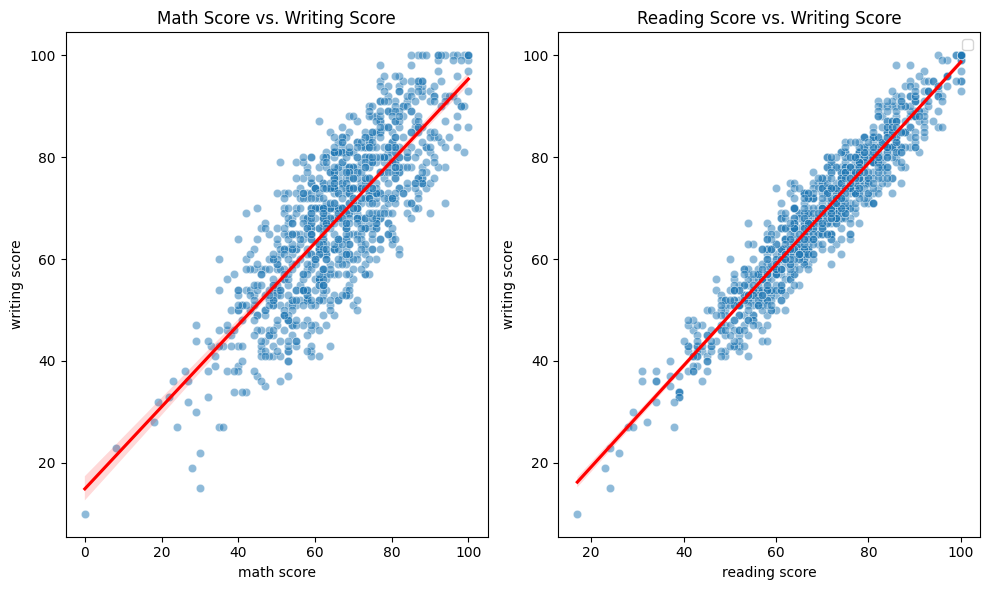

In [14]:
# Scatter plot for Math Score vs. Writing Score
plt.figure(figsize=(10, 6))

# Math Score
plt.subplot(1, 2, 1)
sns.scatterplot(x=spdf['math score'], y=spdf['writing score'], alpha=0.5)
plt.title('Math Score vs. Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

# Fit line for Math Score
sns.regplot(x='math score', y='writing score', data=spdf, scatter=False, color='r', line_kws={"label": "Regression Line"})

# Reading Score
plt.subplot(1, 2, 2)
sns.scatterplot(x=spdf['reading score'], y=spdf['writing score'], alpha=0.5)
plt.title('Reading Score vs. Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

# Fit line for Reading Score
sns.regplot(x='reading score', y='writing score', data=spdf, scatter=False, color='r', line_kws={"label": "Regression Line"})

# Show plots
plt.tight_layout()
plt.legend()
plt.show()

In [15]:
# Fit the model
X_math = spdf[['math score']]  # Predictor variable
y = spdf['writing score']       # Target variable

model = LinearRegression()
model.fit(X_math, y)

# Predictions
y_pred = model.predict(X_math)

Classification 

In [17]:
# Create binary target variable
spdf['pass'] = (spdf['writing score'] >= 65).astype(int)

# Features and target variable
X_class = spdf[['math score', 'reading score', 'lunch_encoded', 'gender_encoded']]
y_class = spdf['pass']

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=12)

# Fit the logistic regression model using statsmodels
X_train_class_sm = sm.add_constant(X_train_class)  # Add a constant
logit_model = sm.Logit(y_train_class, X_train_class_sm)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.181478
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                  800
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.7275
Time:                        04:54:12   Log-Likelihood:                -145.18
converged:                       True   LL-Null:                       -532.70
Covariance Type:            nonrobust   LLR p-value:                1.970e-166
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -26.3175      2.363    -11.137      0.000     -30.949     -21.686
math score       

The logistic regression results indicate that math and reading scores significantly affect the likelihood of passing, while gender has a negative impact and lunch type does not seem to be significant.

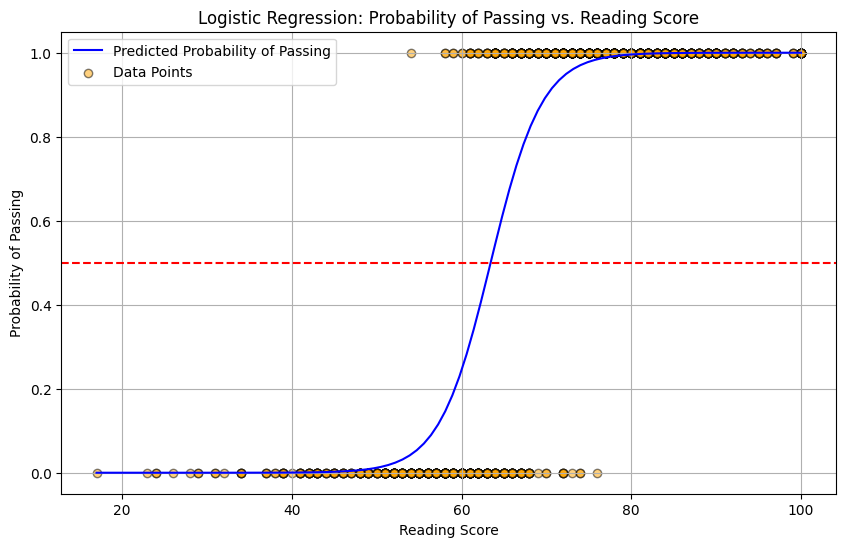

In [18]:
reading_scores = np.linspace(spdf['reading score'].min(), spdf['reading score'].max(), 100)

# Calculate the predicted probabilities for different reading scores while holding other variables constant
# Let's assume average values for math score and lunch_encoded, gender_encoded
avg_math = spdf['math score'].mean()
avg_lunch = spdf['lunch_encoded'].mean()
avg_gender = spdf['gender_encoded'].mean()

# Calculate log odds
log_odds = (result.params['const'] +
            result.params['math score'] * avg_math +
            result.params['lunch_encoded'] * avg_lunch +
            result.params['gender_encoded'] * avg_gender +
            result.params['reading score'] * reading_scores)

# Convert log odds to probabilities
predicted_probabilities = 1 / (1 + np.exp(-log_odds))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reading_scores, predicted_probabilities, label='Predicted Probability of Passing', color='blue')
plt.scatter(spdf['reading score'], spdf['pass'], alpha=0.5, label='Data Points', color='orange', edgecolor='k')
plt.title('Logistic Regression: Probability of Passing vs. Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Probability of Passing')
plt.axhline(0.5, linestyle='--', color='red')  # Add a line at 0.5 for the decision boundary
plt.legend()
plt.grid()
plt.show()

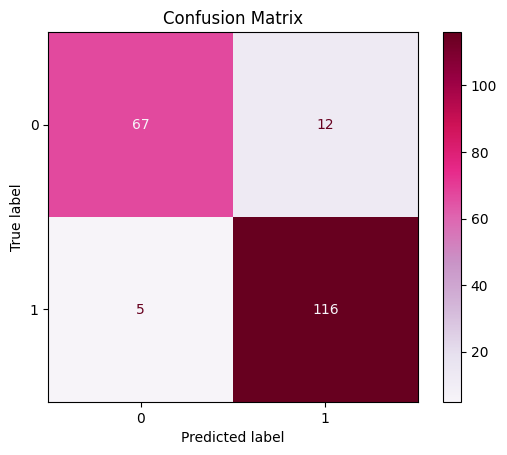

In [21]:
# Create and fit the model using sklearn
log_model = LogisticRegression()
log_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = log_model.predict(X_test_class)
y_pred_prob = log_model.predict_proba(X_test_class)[:, 1]

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap=plt.cm.PuRd)
plt.title('Confusion Matrix')
plt.show()

An accuracy of 0.905 (or 90.5%) means that the model correctly predicted whether students passed or failed 90.5% of the time. This is generally considered a good accuracy rate, especially in educational contexts.

Precision, recall, and F1-scores are all high, indicating that the model is effective in predicting both passing and failing students.
The model appears to be well-balanced, as seen in the macro and weighted averages.


In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define model with scaling
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.855 0.855 0.875 0.865 0.865]
Average Accuracy: 0.8630000000000001


The array [0.855, 0.855, 0.875, 0.865, 0.865] represents the accuracy of the model on each of the 5 folds during cross-validation.
Each value indicates the proportion of correct predictions made by the model for one specific fold of the data.
Average Accuracy:
The average accuracy of 0.863 indicates the overall performance of the model across all folds.
An average accuracy around 86.3% suggests that the model is performing quite well on the validation set.